# Simple Stock Date

## Update : 26/04/2020

## This tutorial is about date and how to manipulate date in dataframe.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import warnings
warnings.filterwarnings("ignore")

# fix_yahoo_finance is used to fetch data 
import yfinance as yf
yf.pdr_override()

In [3]:
# input
symbol = 'AAPL'
start = '2015-01-01'
end = '2019-01-01'

# Read data 
dataset = yf.download(symbol,start,end)

# View Columns
dataset.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-12-31,112.820000,113.129997,110.209999,110.379997,101.178932,41403400
2015-01-02,111.389999,111.440002,107.349998,109.330002,100.216454,53204600
2015-01-05,108.290001,108.650002,105.410004,106.250000,97.393181,64285500
2015-01-06,106.540001,107.430000,104.629997,106.260002,97.402374,65797100
2015-01-07,107.199997,108.199997,106.699997,107.750000,98.768150,40105900


In [4]:
# Date becomes a columns
df = dataset.copy() # Copy the original data
dfn = df.reset_index()
dfn.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-12-31,112.820000,113.129997,110.209999,110.379997,101.178932,41403400
1,2015-01-02,111.389999,111.440002,107.349998,109.330002,100.216454,53204600
2,2015-01-05,108.290001,108.650002,105.410004,106.250000,97.393181,64285500
3,2015-01-06,106.540001,107.430000,104.629997,106.260002,97.402374,65797100
4,2015-01-07,107.199997,108.199997,106.699997,107.750000,98.768150,40105900


In [5]:
df = dataset.copy()

In [6]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-12-31,112.820000,113.129997,110.209999,110.379997,101.178932,41403400
2015-01-02,111.389999,111.440002,107.349998,109.330002,100.216454,53204600
2015-01-05,108.290001,108.650002,105.410004,106.250000,97.393181,64285500
2015-01-06,106.540001,107.430000,104.629997,106.260002,97.402374,65797100
2015-01-07,107.199997,108.199997,106.699997,107.750000,98.768150,40105900


In [7]:
# Add Year, Month, Day
df['Year'] = df.index.year
df['Month'] = df.index.month
df['Day'] = df.index.day

In [8]:
df.head()

,Open,High,Low,Close,Adj Close,Volume,Year,Month,Day
Date,,,,,,,,,
2014-12-31,112.820000,113.129997,110.209999,110.379997,101.178932,41403400,2014,12,31
2015-01-02,111.389999,111.440002,107.349998,109.330002,100.216454,53204600,2015,1,2
2015-01-05,108.290001,108.650002,105.410004,106.250000,97.393181,64285500,2015,1,5
2015-01-06,106.540001,107.430000,104.629997,106.260002,97.402374,65797100,2015,1,6
2015-01-07,107.199997,108.199997,106.699997,107.750000,98.768150,40105900,2015,1,7


In [9]:
# Convert Daily to Weekly
weekly = dataset.copy()
weekly = weekly.resample('W').last()
weekly.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-01-04,111.389999,111.440002,107.349998,109.330002,100.216454,53204600
2015-01-11,112.669998,113.250000,110.209999,112.010002,102.673050,53699500
2015-01-18,107.029999,107.580002,105.199997,105.989998,97.154854,78513300
2015-01-25,112.300003,113.750000,111.529999,112.980003,103.562195,46464800
2015-02-01,118.400002,120.000000,116.849998,117.160004,107.393768,83745500


In [10]:
# Convert Daily to Yearly
yearly = dataset.copy()
yearly = yearly.asfreq('BY') # Use Business Year - 'BY'
yearly.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-12-31,112.820000,113.129997,110.209999,110.379997,101.178932,41403400
2015-12-31,107.010002,107.029999,104.820000,105.260002,98.129669,40912300
2016-12-30,116.650002,117.199997,115.430000,115.820000,110.376678,30586300
2017-12-29,170.520004,170.589996,169.220001,169.229996,163.869995,25999900
2018-12-31,158.529999,159.360001,156.479996,157.740005,155.037109,35003500


In [11]:
# Choose Particular Year to analyze
monthly = dataset.copy()
monthly = monthly.reset_index()
y2017 = monthly[monthly['Date'].dt.year==2017]
y2017

,Date,Open,High,Low,Close,Adj Close,Volume
505,2017-01-03,115.800003,116.330002,114.760002,116.150002,110.691154,28781900
506,2017-01-04,115.849998,116.510002,115.750000,116.019997,110.567276,21118100
507,2017-01-05,115.919998,116.860001,115.809998,116.610001,111.129562,22193600
508,2017-01-06,116.779999,118.160004,116.470001,117.910004,112.368469,31751900
509,2017-01-09,117.949997,119.430000,117.940002,118.989998,113.397697,33561900
...,...,...,...,...,...,...,...
751,2017-12-22,174.679993,175.419998,174.500000,175.009995,169.466919,16349400
752,2017-12-26,170.800003,171.470001,169.679993,170.570007,165.167572,33185500
753,2017-12-27,170.100006,170.779999,169.710007,170.600006,165.196625,21498200
754,2017-12-28,171.000000,171.850006,170.479996,171.080002,165.661407,16480200


In [12]:
month_name = dataset.copy()

In [13]:
# Convert Daily to Monthly
month_name = month_name.asfreq('M')

In [14]:
month_name['Month_Name'] = month_name.index.month

In [15]:
month_name.head()

,Open,High,Low,Close,Adj Close,Volume,Month_Name
Date,,,,,,,
2014-12-31,112.820000,113.129997,110.209999,110.379997,101.178932,41403400.0,12
2015-01-31,NaN,NaN,NaN,NaN,NaN,NaN,1
2015-02-28,NaN,NaN,NaN,NaN,NaN,NaN,2
2015-03-31,126.089996,126.489998,124.360001,124.430000,114.507881,42090600.0,3
2015-04-30,128.639999,128.639999,124.580002,125.150002,115.170479,83195400.0,4


In [16]:
import calendar

month_name['Month_ABBR'] = month_name['Month_Name'].apply(lambda x: calendar.month_abbr[x])
month_name.head()

,Open,High,Low,Close,Adj Close,Volume,Month_Name,Month_ABBR
Date,,,,,,,,
2014-12-31,112.820000,113.129997,110.209999,110.379997,101.178932,41403400.0,12,Dec
2015-01-31,NaN,NaN,NaN,NaN,NaN,NaN,1,Jan
2015-02-28,NaN,NaN,NaN,NaN,NaN,NaN,2,Feb
2015-03-31,126.089996,126.489998,124.360001,124.430000,114.507881,42090600.0,3,Mar
2015-04-30,128.639999,128.639999,124.580002,125.150002,115.170479,83195400.0,4,Apr


In [17]:
month_name['Month_Name'] = month_name['Month_Name'].apply(lambda x: calendar.month_name[x])
month_name.head()

,Open,High,Low,Close,Adj Close,Volume,Month_Name,Month_ABBR
Date,,,,,,,,
2014-12-31,112.820000,113.129997,110.209999,110.379997,101.178932,41403400.0,December,Dec
2015-01-31,NaN,NaN,NaN,NaN,NaN,NaN,January,Jan
2015-02-28,NaN,NaN,NaN,NaN,NaN,NaN,February,Feb
2015-03-31,126.089996,126.489998,124.360001,124.430000,114.507881,42090600.0,March,Mar
2015-04-30,128.639999,128.639999,124.580002,125.150002,115.170479,83195400.0,April,Apr


In [18]:
# Pivot Table Date
df_months = pd.pivot_table(df, index=df.index.month, columns=df.index.year, values = 'Adj Close') # each months 
df_months

Date,2014,2015,2016,2017,2018
Date,,,,,
1,NaN,101.418630,91.761363,113.950438,168.493986
2,NaN,115.362144,89.672318,127.812714,162.791176
3,NaN,115.925924,97.731656,134.590064,169.658301
4,NaN,117.141145,100.048495,136.761823,165.125647
5,NaN,118.891228,89.486703,146.088756,180.840478
6,NaN,118.106726,91.117258,142.078418,184.099089
7,NaN,115.822929,92.941287,142.528332,185.748575
8,NaN,105.193402,102.010794,153.252711,208.745572
9,NaN,104.708494,105.107428,152.069908,217.509478


In [19]:
df_days = pd.pivot_table(df, index=df.index.day, columns=df.index.year, values = 'Adj Close') # daily for one whole months
df_days

Date,2014,2015,2016,2017,2018
Date,,,,,
1,NaN,111.677385,97.972545,146.645706,188.516493
2,NaN,110.766190,96.705587,143.958868,182.241316
3,NaN,111.590118,96.804434,138.745556,184.849886
4,NaN,112.181770,98.624430,142.032122,188.714142
5,NaN,110.119956,97.173225,143.569197,185.542435
6,NaN,110.565327,97.912269,143.086531,184.446950
7,NaN,109.567539,99.212897,147.202559,185.455782
8,NaN,110.446729,97.595490,149.405453,185.682903
9,NaN,110.154344,97.563037,142.287893,184.047682


In [20]:
df_all_columns = pd.pivot_table(df, index=df.index.month, columns=df.index.year)
df_all_columns

Adj Close                                                       Close  \
Date        2014        2015        2016        2017        2018        2014   
Date                                                                           
1            NaN  101.418630   91.761363  113.950438  168.493986         NaN   
2            NaN  115.362144   89.672318  127.812714  162.791176         NaN   
3            NaN  115.925924   97.731656  134.590064  169.658301         NaN   
4            NaN  117.141145  100.048495  136.761823  165.125647         NaN   
5            NaN  118.891228   89.486703  146.088756  180.840478         NaN   
6            NaN  118.106726   91.117258  142.078418  184.099089         NaN   
7            NaN  115.822929   92.941287  142.528332  185.748575         NaN   
8            NaN  105.193402  102.010794  153.252711  208.745572         NaN   
9            NaN  104.708494  105.107428  152.069908  217.509478         NaN   
10           NaN  105.230546  109.705870  152.271344  216.306680         NaN   
11           NaN  110.085496  104.925534  166.745951  187.788782         NaN   
12    101.178932  104.158434  108.962157  166.447194  161.451577  110.379997   

                                                      ...      Volume  \
Date        2015        2016        2017        2018  ...        2014   
Date                                                  ...               
1     110.641501   98.428946  119.570000  174.005237  ...         NaN   
2     125.432105   95.746500  133.714209  167.638947  ...         NaN   
3     125.970908  104.267273  140.617826  174.496192  ...         NaN   
4     127.291428  106.739048  142.886842  169.834287  ...         NaN   
5     128.761500   94.974762  152.227726  185.536818  ...         NaN   
6     127.806817   96.622273  147.831362  188.621429  ...         NaN   
7     125.335455   98.556500  148.299500  190.311429  ...         NaN   
8     113.394762  107.665218  159.021306  213.346089  ...         NaN   
9     112.797619  110.857142  157.608500  222.073685  ...         NaN   
10    113.360000  115.707143  157.817273  220.845652  ...         NaN   
11    118.162500  110.154285  172.406191  191.235714  ...         NaN   
12    111.726818  114.335714  171.891500  164.266317  ...  41403400.0   

                                                                Year          \
Date          2015          2016          2017          2018    2014    2015   
Date                                                                           
1     6.526317e+07  6.693937e+07  2.815610e+07  3.141330e+07     NaN  2015.0   
2     5.981764e+07  4.054313e+07  3.026151e+07  4.883654e+07     NaN  2015.0   
3     5.175646e+07  3.391135e+07  2.441863e+07  3.398703e+07     NaN  2015.0   
4     4.743502e+07  4.154208e+07  1.964758e+07  3.172163e+07     NaN  2015.0   
5     4.770760e+07  4.288912e+07  2.972645e+07  2.822620e+07     NaN  2015.0   
6     3.993667e+07  3.543171e+07  3.109900e+07  2.512498e+07     NaN  2015.0   
7     4.810366e+07  3.428898e+07  2.110060e+07  1.874721e+07     NaN  2015.0   
8     7.651520e+07  2.739689e+07  2.874213e+07  3.044865e+07     NaN  2015.0   
9     5.745463e+07  4.609598e+07  3.401870e+07  3.573537e+07     NaN  2015.0   
10    5.056873e+07  3.271020e+07  2.292233e+07  3.433689e+07     NaN  2015.0   
11    3.753203e+07  3.435976e+07  2.860302e+07  4.577745e+07     NaN  2015.0   
12    4.190524e+07  2.898913e+07  2.655919e+07  4.731171e+07  2014.0  2015.0   

                              
Date    2016    2017    2018  
Date                          
1     2016.0  2017.0  2018.0  
2     2016.0  2017.0  2018.0  
3     2016.0  2017.0  2018.0  
4     2016.0  2017.0  2018.0  
5     2016.0  2017.0  2018.0  
6     2016.0  2017.0  2018.0  
7     2016.0  2017.0  2018.0  
8     2016.0  2017.0  2018.0  
9     2016.0  2017.0  2018.0  
10    2016.0  2017.0  2018.0  
11    2016.0  2017.0  2018.0  
12    2016.0  2017.0  2018.0  

[12 rows x 45 columns]

In [21]:
stock_data = df.copy()

stock_data['Year'] = df.index.year
stock_data['Month'] = df.index.month
stock_data['Day'] = df.index.day
stock_data['Week_Day'] = df.index.dayofweek
stock_data['Week_Day_Name'] = df.index.strftime('%A')
stock_data.tail(10)

,Open,High,Low,Close,Adj Close,Volume,Year,Month,Day,Week_Day,Week_Day_Name
Date,,,,,,,,,,,
2018-12-17,165.449997,168.350006,162.729996,163.940002,161.130859,44287900,2018,12,17,0,Monday
2018-12-18,165.380005,167.529999,164.389999,166.070007,163.224365,33841500,2018,12,18,1,Tuesday
2018-12-19,166.000000,167.449997,159.089996,160.889999,158.133102,49047300,2018,12,19,2,Wednesday
2018-12-20,160.399994,162.110001,155.300003,156.830002,154.142670,64773000,2018,12,20,3,Thursday
2018-12-21,156.860001,158.160004,149.630005,150.729996,148.147202,95744600,2018,12,21,4,Friday
2018-12-24,148.149994,151.550003,146.589996,146.830002,144.314041,37169200,2018,12,24,0,Monday
2018-12-26,148.300003,157.229996,146.720001,157.169998,154.476852,58582500,2018,12,26,2,Wednesday
2018-12-27,155.839996,156.770004,150.070007,156.149994,153.474335,53117100,2018,12,27,3,Thursday
2018-12-28,157.500000,158.520004,154.550003,156.229996,153.552979,42291400,2018,12,28,4,Friday


In [22]:
approach1 = stock_data.groupby(['Year', 'Month']).first()['Adj Close']
approach1.tail(12)

Year  Month
2018  1        166.804016
      2        162.465912
      3        170.148117
      4        162.058807
      5        164.411697
      6        185.678833
      7        182.692215
      8        196.668900
      9        223.666595
      10       222.589203
      11       217.652786
      12       181.653076
Name: Adj Close, dtype: float64

In [23]:
approach2 = stock_data.groupby(['Year', 'Day']).first()['Adj Close']
approach2.tail(12)

Year  Day
2018  20     167.085480
      21     166.327103
      22     171.393921
      23     171.432632
      24     168.701950
      25     165.690445
      26     166.077759
      27     173.444168
      28     173.181656
      29     162.640213
      30     161.681580
      31     162.127014
Name: Adj Close, dtype: float64

## Convert Date to String

In [24]:
string_date = dataset.copy()

In [25]:
string_date['Date'] = string_date.index
string_date.head()

,Open,High,Low,Close,Adj Close,Volume,Date
Date,,,,,,,
2014-12-31,112.820000,113.129997,110.209999,110.379997,101.178932,41403400,2014-12-31
2015-01-02,111.389999,111.440002,107.349998,109.330002,100.216454,53204600,2015-01-02
2015-01-05,108.290001,108.650002,105.410004,106.250000,97.393181,64285500,2015-01-05
2015-01-06,106.540001,107.430000,104.629997,106.260002,97.402374,65797100,2015-01-06
2015-01-07,107.199997,108.199997,106.699997,107.750000,98.768150,40105900,2015-01-07


In [26]:
string_date['Date'] = string_date['Date'].dt.strftime("%Y%m%d").astype(int)

In [27]:
# Convert Date to Numbers
string_date.head()

,Open,High,Low,Close,Adj Close,Volume,Date
Date,,,,,,,
2014-12-31,112.820000,113.129997,110.209999,110.379997,101.178932,41403400,20141231
2015-01-02,111.389999,111.440002,107.349998,109.330002,100.216454,53204600,20150102
2015-01-05,108.290001,108.650002,105.410004,106.250000,97.393181,64285500,20150105
2015-01-06,106.540001,107.430000,104.629997,106.260002,97.402374,65797100,20150106
2015-01-07,107.199997,108.199997,106.699997,107.750000,98.768150,40105900,20150107


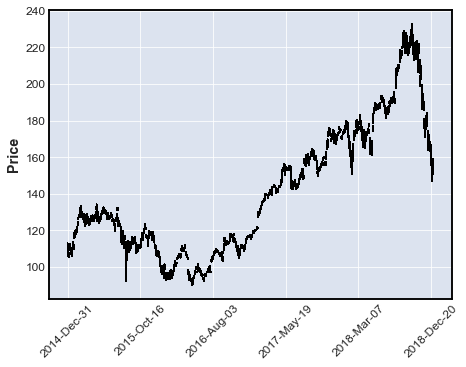

In [28]:
import mplfinance as mpf
mpf.plot(string_date)